## Clustering asthma-related papers in CORD-19 dataset

### Introduction
The goal of this project is to explore research topics in asthma and coronviruses. What are the most popular topics the research community is focused on, before and after the COVID-19 outbreak? Are the areas of interest around asthma and coronaviruses the same before and after the appearance of SARS-CoV-2? 

In this project, I use Natural Language Processing (NLP) techniques in Python, to explore topics of research between asthma and coronaviruses before the identification of SARS-CoV-2, but also after the outbreak of the pandemic. The analysis is based on clustering scientific publications, in order to create groups of papers with similar topics. Two groups of clusters are created, one for papers published before and one for papers published after the COVID-19 outbreak. For the two periods of times, clustering aims at identifying popular research topics and finding potential gaps in research between asthma and the new coronavirus.

More details about the motivation and the scientific background of this data analysis can be found here:

### Data
In response to the COVID-19 pandemic a large database, the COVID-19 Open Research Dataset (CORD-19), was created and has been made publicly available. CORD-19 is a resource of hundreds of thousands scholarly articles, about COVID-19, SARS-CoV-2, and related coronaviruses: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

### Collecting and Preprocessing Data

From this large database, I keep only those papers where the word "asthma" appears at least once in the abstract.

I went through the following text preprocessing steps, using NLTK and SpaCy:
- Removal of stop words
- Removal of non-English publications

Using their publication date, I divided the papers into those published before the outbreak of the pandemic (December 2019) and those published after. For the two groups of papers I applied:
- Tokenization
- Stemming
- Use of the Scikit-learn's Tfidf Vectorizer to transform tokens into a matrix of TF-IDF features
- Application of the KMeans algorithm for Clustering
- Application of the PCA algorithm for dimensionality reduction and clusters' visualization

*Note that this data analysis was performed in February 2021 and doesn't take into account potential databases updates.*


### Loading libraries

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image


In [95]:
import nltk
import string
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from langdetect import detect

In [142]:
import plotly.express as px
import plotly.io as pio
pio.renderers
import plotly.graph_objects as go

import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator


In [97]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


In [98]:
spacy_stop_words = ['whence', 'here', 'show', 'were', 'why', 'n’t', 'the', 'whereupon', 'not', 'more', 'how', 'eight', 'indeed', 'i', 'only', 'via', 'nine', 're', 'themselves', 'almost', 'to', 'already', 'front', 'least', 'becomes', 'thereby', 'doing', 'her', 'together', 'be', 'often', 'then', 'quite', 'less', 'many', 'they', 'ourselves', 'take', 'its', 'yours', 'each', 'would', 'may', 'namely', 'do', 'whose', 'whether', 'side', 'both', 'what', 'between', 'toward', 'our', 'whereby', "'m", 'formerly', 'myself', 'had', 'really', 'call', 'keep', "'re", 'hereupon', 'can', 'their', 'eleven', '’m', 'even', 'around', 'twenty', 'mostly', 'did', 'at', 'an', 'seems', 'serious', 'against', "n't", 'except', 'has', 'five', 'he', 'last', '‘ve', 'because', 'we', 'himself', 'yet', 'something', 'somehow', '‘m', 'towards', 'his', 'six', 'anywhere', 'us', '‘d', 'thru', 'thus', 'which', 'everything', 'become', 'herein', 'one', 'in', 'although', 'sometime', 'give', 'cannot', 'besides', 'across', 'noone', 'ever', 'that', 'over', 'among', 'during', 'however', 'when', 'sometimes', 'still', 'seemed', 'get', "'ve", 'him', 'with', 'part', 'beyond', 'everyone', 'same', 'this', 'latterly', 'no', 'regarding', 'elsewhere', 'others', 'moreover', 'else', 'back', 'alone', 'somewhere', 'are', 'will', 'beforehand', 'ten', 'very', 'most', 'three', 'former', '’re', 'otherwise', 'several', 'also', 'whatever', 'am', 'becoming', 'beside', '’s', 'nothing', 'some', 'since', 'thence', 'anyway', 'out', 'up', 'well', 'it', 'various', 'four', 'top', '‘s', 'than', 'under', 'might', 'could', 'by', 'too', 'and', 'whom', '‘ll', 'say', 'therefore', "'s", 'other', 'throughout', 'became', 'your', 'put', 'per', "'ll", 'fifteen', 'must', 'before', 'whenever', 'anyone', 'without', 'does', 'was', 'where', 'thereafter', "'d", 'another', 'yourselves', 'n‘t', 'see', 'go', 'wherever', 'just', 'seeming', 'hence', 'full', 'whereafter', 'bottom', 'whole', 'own', 'empty', 'due', 'behind', 'while', 'onto', 'wherein', 'off', 'again', 'a', 'two', 'above', 'therein', 'sixty', 'those', 'whereas', 'using', 'latter', 'used', 'my', 'herself', 'hers', 'or', 'neither', 'forty', 'thereupon', 'now', 'after', 'yourself', 'whither', 'rather', 'once', 'from', 'until', 'anything', 'few', 'into', 'such', 'being', 'make', 'mine', 'please', 'along', 'hundred', 'should', 'below', 'third', 'unless', 'upon', 'perhaps', 'ours', 'but', 'never', 'whoever', 'fifty', 'any', 'all', 'nobody', 'there', 'have', 'anyhow', 'of', 'seem', 'down', 'is', 'every', '’ll', 'much', 'none', 'further', 'me', 'who', 'nevertheless', 'about', 'everywhere', 'name', 'enough', '’d', 'next', 'meanwhile', 'though', 'through', 'on', 'first', 'been', 'hereby', 'if', 'move', 'so', 'either', 'amongst', 'for', 'twelve', 'nor', 'she', 'always', 'these', 'as', '’ve', 'amount', '‘re', 'someone', 'afterwards', 'you', 'nowhere', 'itself', 'done', 'hereafter', 'within', 'made', 'ca', 'them']

In [99]:
# extending the list of stopwords taken into account
stop_words.extend(spacy_stop_words)


### Data overview

In [100]:
# Loading the csv file to a pandas dataframe, to have a look at the papers' metadata:
asthma_df = pd.read_csv("asthma_data.csv")
asthma_df.head()

,gitcord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower
0,qva0jt86,4ba79e54ecf81b30b56461a6aec2094eaf7b7f06,PMC,Relevance of human metapneumovirus in exacerba...,10.1186/1465-9921-6-150,PMC1334186,16371156.0,cc-by,BACKGROUND AND METHODS: Human metapneumovirus ...,2005-12-21,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/4ba79e54ecf81b30b5646...,document_parses/pmc_json/PMC1334186.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,background and methods: human metapneumovirus ...,relevance of human metapneumovirus in exacerba...
1,chz8luni,d68d71553d3a31381c0c3851351f912a9a7be1c9,PMC,Surfactant therapy for acute respiratory failu...,10.1186/cc5944,PMC2206432,17573963.0,cc-by,INTRODUCTION: Exogenous surfactant is used to ...,2007-06-15,...,Crit Care,NaN,NaN,NaN,document_parses/pdf_json/d68d71553d3a31381c0c3...,document_parses/pmc_json/PMC2206432.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,introduction: exogenous surfactant is used to ...,surfactant therapy for acute respiratory failu...
2,3zh8jmc2,fe2000f280297c40bc53ce95d703a9ca6aac19fd,PMC,Differential Regulation of Type I Interferon a...,10.1371/journal.ppat.1000587,PMC2736567,19806178.0,cc-by,A number of paramyxoviruses are responsible fo...,2009-09-18,...,PLoS Pathog,NaN,NaN,NaN,document_parses/pdf_json/fe2000f280297c40bc53c...,document_parses/pmc_json/PMC2736567.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,a number of paramyxoviruses are responsible fo...,differential regulation of type i interferon a...
3,7p3b6tyf,3ccbd07ee1865e4f2afffdb6cc8b6039ab605ee7,PMC,The Tennessee Children's Respiratory Initiativ...,10.1111/j.1440-1843.2010.01743.x,PMC2992986,20409023.0,no-cc,Background and objective: The ‘attack rate’ of...,2010-04-08,...,Respirology,NaN,NaN,NaN,document_parses/pdf_json/3ccbd07ee1865e4f2afff...,document_parses/pmc_json/PMC2992986.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,background and objective: the ‘attack rate’ of...,the tennessee children's respiratory initiativ...
4,xrsyj1tc,fa88fbb8716e5fca7d513bcb5a0a608456a59205,PMC,Analysing the eosinophil cationic protein - a ...,10.1186/1465-9921-12-10,PMC3030543,21235798.0,cc-by,Eosinophil granulocytes reside in respiratory ...,2011-01-14,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/fa88fbb8716e5fca7d513...,document_parses/pmc_json/PMC3030543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,eosinophil granulocytes reside in respiratory ...,analysing the eosinophil cationic protein - a ...


There are 2567 papers containing the word "asthma", among the coronavirus-related publications 

In [101]:
asthma_df.shape

(2567, 21)

In [102]:
# Use of langdetect google library to dect the language of the "abstract" column in our dataframe

asthma_df["lang_detect"] = asthma_df["abstract"].apply(detect)

In [103]:
# As non-english papers occupy only a small percent of our total papers, they are excluded from the analysis

asthma_df["lang_detect"].value_counts()

en    2530
fr      11
de      11
es       8
ru       3
pt       2
nl       2
Name: lang_detect, dtype: int64

There are 2528 papers in total, written in english.

In [104]:
asthma_df = asthma_df.loc[asthma_df['lang_detect'] == "en"]
asthma_df.shape

(2530, 22)

I'd like to quickly vizualize the text of these papers, that's why I create a wordcloud where the most frequent words are represented by a bigger font!

In [ ]:
abstract_tolist = asthma_df["abstract"].tolist()
text = " ".join(abst for abst in abstract_tolist)

wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I'd like to give a shape to my image and use it as a cover for my article! What would it be?

In [171]:
virus_mask = np.array(Image.open("coronavirus.png"))

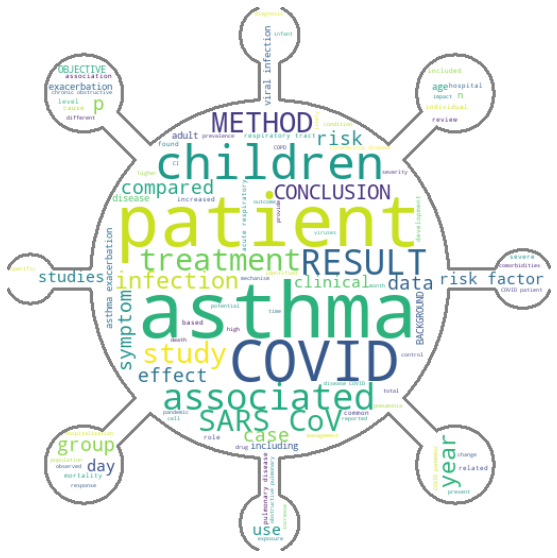

In [174]:
wc = WordCloud(background_color="white", max_words=100, mask=virus_mask,
               stopwords=stop_words, contour_width=3, contour_color='gray')

wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's go back to data processing!

Papers are divided between those published before the identification of the new coronavirus, SARS-CoV-2, and those published after. I pick December 2019 as the cut-off date.

In [173]:
asthma_before_covid = asthma_df.loc[asthma_df['publish_time']<"2019-12-01"].reset_index(drop=True)
asthma_after_covid = asthma_df.loc[asthma_df['publish_time']>="2019-12-01"].reset_index(drop=True)

Let's have a look at the number of the papers published, per month, since the covid outbreak. 

In [106]:
asthma_after_covid['publish_time_new'] =  pd.to_datetime(asthma_after_covid['publish_time'])

In [107]:
asthma_after_covid['publish_month_year'] = pd.to_datetime(asthma_after_covid['publish_time']).dt.to_period('M')
asthma_after_covid.head()

,gitcord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower,lang_detect,publish_time_new,publish_month_year
0,3ki0dzwb,71b8c50ee0e1f4e79e6618301b768befbf943a5d,PMC,Inflammatory and microbiological associations ...,10.1183/23120541.00267-2019,PMC6983494,32010717.0,cc-by-nc,Patients with near-fatal asthma requiring ECMO...,2020-01-27,...,NaN,document_parses/pdf_json/71b8c50ee0e1f4e79e661...,document_parses/pmc_json/PMC6983494.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,patients with near-fatal asthma requiring ecmo...,inflammatory and microbiological associations ...,en,2020-01-27,2020-01
1,okc7wf4n,f4edbfd3e9a8b2d0d76378e6588a5971b070a4c9,PMC,Different effects of acetyl-CoA carboxylase in...,10.1007/s43440-019-00027-8,PMC7223088,32048254.0,no-cc,BACKGROUND AND OBJECTIVE: Acetyl CoA carboxyla...,2020-01-08,...,NaN,document_parses/pdf_json/f4edbfd3e9a8b2d0d7637...,document_parses/pmc_json/PMC7223088.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,background and objective: acetyl coa carboxyla...,different effects of acetyl-coa carboxylase in...,en,2020-01-08,2020-01
2,8lqjl0ee,1f6fa8e138abc1556e853c53dcce8f5e16007fcc,PMC,Risk of Readmission and Mortality Following Ho...,10.1007/s00408-019-00300-w,PMC7223622,31828514.0,no-cc,PURPOSE: Hypercapnic respiratory failure (HRF)...,2019-12-11,...,NaN,document_parses/pdf_json/1f6fa8e138abc1556e853...,document_parses/pmc_json/PMC7223622.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,purpose: hypercapnic respiratory failure (hrf)...,risk of readmission and mortality following ho...,en,2019-12-11,2019-12
3,vosu7y6j,6fa9233f054f4bbb31972e05c1478b0ec83ccc16,PMC,Innate Type 2 Responses to Respiratory Syncyti...,10.3390/v12050521,PMC7290766,32397226.0,cc-by,Respiratory syncytial virus (RSV) is a common ...,2020-05-08,...,NaN,document_parses/pdf_json/6fa9233f054f4bbb31972...,document_parses/pmc_json/PMC7290766.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,respiratory syncytial virus (rsv) is a common ...,innate type 2 responses to respiratory syncyti...,en,2020-05-08,2020-05
4,yyw64g9w,8d634bba632c08e7d8e105a66dac4e0d813ab4e9,PMC,From Mouse to Man and Back: Closing the Correl...,10.3390/diagnostics10090636,PMC7554749,32859103.0,cc-by,"Lung diseases such as fibrosis, asthma, cystic...",2020-08-26,...,NaN,document_parses/pdf_json/8d634bba632c08e7d8e10...,document_parses/pmc_json/PMC7554749.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,"lung diseases such as fibrosis, asthma, cystic...",from mouse to man and back: closing the correl...,en,2020-08-26,2020-08


In [108]:
asthma_after_covid = asthma_after_covid.sort_values('publish_month_year')

In [109]:
dates = asthma_after_covid["publish_month_year"].value_counts()

In [110]:
dates_df = dates.to_frame().reset_index()

In [111]:
dates_df = dates_df.sort_values("index")
dates_df.rename(columns={"index": "date_published", "publish_month_year":"number of papers"})

,date_published,number of papers
12,2019-12,10
0,2020-01,602
13,2020-02,9
14,2020-03,8
11,2020-04,19
8,2020-05,69
7,2020-06,74
3,2020-07,92
9,2020-08,60
4,2020-09,90


The graph below illustrates the number of papers published through the last 12-14 months. However, we recognize that the two picks noticed in January 2020 and January 2021 are not completely accurate. As a certain number of papers had only the year (yyyy) mentioned as publication date, January 1st of that year (01/01/yyyy) is taken as their complete date.

As a result, we cannot draw a very accurate example of the distribution of publications through the months.

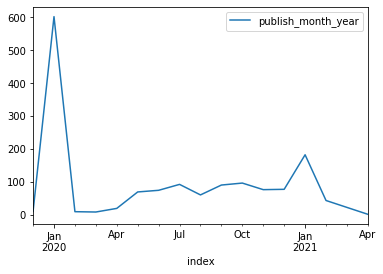

In [112]:
dates_df.plot(x ='index', y = 'publish_month_year')

## Clustering

### Before COVID-19

In [113]:
texts_before = asthma_before_covid["abstract_lower"].tolist()

In [114]:
def custom_tokenizer(str_input):
    
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(str_input)
    words = [word for word in words if word.lower() not in stop_words]

    words = [word.replace('â¡', '') for word in words]
    words = [word.replace('â¢', '') for word in words]
    words = [word.replace('â£', '') for word in words]
    
    words = [''.join(c for c in word if c not in string.punctuation+'©±×≤≥●＜--“”→„') for word in words]
    words = [word for word in words if word not in ['‘', '’', '„']]
        
    words = [word for word in words if word]
    words = [word for word in words if not any(char.isdigit() for char in word)]
    
    words = [stemmer.stem(word) for word in words]
    return words

In [115]:
vec_before = TfidfVectorizer(min_df=5,tokenizer=custom_tokenizer,
                             max_features=2000,
                      stop_words='english')

matrix_before = vec_before.fit_transform(texts_before)
df_before = pd.DataFrame(matrix_before.toarray(), columns=vec_before.get_feature_names())
df_before.head()

c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



,aberr,abil,abl,abnorm,absenc,absent,absolut,absorpt,abstract,abund,...,x,xray,year,yield,young,younger,yr,α,β,–
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.040192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.035602,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For more information about the use of Kmeans in clustering: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [118]:
number_of_clusters=10
km_before = KMeans(n_clusters=number_of_clusters)
km_before.fit(matrix_before)

KMeans(n_clusters=10)

Let's have an overview of our clusters' centers (centroids) and labels. Then we get the top 20 terms for every cluster. In other words, we see which are the most frequently mentioned words per cluster. Note that since we have applied Stemming, we only have the "root" of the words now.

In [119]:
centroids_before, labels_before = km_before.cluster_centers_, km_before.labels_
print(centroids_before)

[[0.         0.00594015 0.         ... 0.         0.         0.        ]
 [0.00237017 0.00328686 0.00287787 ... 0.0029904  0.00367259 0.00106834]
 [0.         0.00270455 0.00102338 ... 0.         0.         0.        ]
 ...
 [0.         0.00074631 0.         ... 0.         0.00072186 0.00328164]
 [0.00208124 0.00319583 0.00086338 ... 0.00440346 0.00484143 0.00609701]
 [0.         0.         0.         ... 0.         0.         0.00303525]]


In [120]:
print("Top terms per cluster:")
order_centroids_before = centroids_before.argsort()[:, ::-1]
terms = vec_before.get_feature_names()
for i in range(number_of_clusters):
    top_words = [terms[ind] for ind in order_centroids_before[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_words)))

Top terms per cluster:
Cluster 0: hrv hrvc children infect hrva human respiratori ill speci strain associ detect asthma caus identifi exacerb rhinovirus virus lower divers
Cluster 1: cell airway infect respons express mice increas inflamm epitheli exacerb level asthma induc rv viral subject activ asthmat eosinophil cytokin
Cluster 2: wheez children risk asthma recurr age episod year factor earli ill sensit associ respiratori viral infect develop childhood rv p
Cluster 3: patient exacerb asthma infect respiratori detect children viral pneumonia virus viru p acut sampl asthmat group studi hospit sever control
Cluster 4: asthma exacerb infect viral respiratori virus diseas develop review airway mechan factor respons role caus associ immun trigger current risk
Cluster 5: hmpv children infect respiratori metapneumoviru hospit patient detect pathogen viru human rsv pneumonia year clinic diseas viral studi bronchiol test
Cluster 6: asthma patient health studi use children effect diseas year m

In [121]:
order_centroids_before

array([[ 824,  827,  293, ..., 1162, 1163,    0],
       [ 270,   72,  900, ...,  614,  613,  999],
       [1972,  293, 1598, ..., 1123, 1124,    0],
       ...,
       [1576,  293,  899, ..., 1713,  789,    0],
       [ 527, 1041,  270, ...,  401,  826, 1132],
       [ 906, 1915, 1576, ...,  560, 1239,    0]], dtype=int64)

For more information about PCA and its implementation in Python:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [122]:
T_before = preprocessing.Normalizer().fit_transform(df_before)

# Dimesionality reduction to 2
pca_model = PCA(n_components=2, random_state = 2)
pca_model.fit(T_before) 
T_before = pca_model.transform(T_before)

In [123]:
asthma_before_covid['Labels'] = km_before.labels_
asthma_before_covid['pca_1'] = T_before[:, 0]
asthma_before_covid['pca_2'] = T_before[:, 1]

In [124]:
asthma_before_covid['Labels'] = asthma_before_covid['Labels'].astype(str)

In [125]:
asthma_before_covid['Labels'].value_counts().sort_values(ascending=False)

6    226
3    140
4    129
8    121
1    106
7    105
9     81
2     61
0     37
5     16
Name: Labels, dtype: int64

In [126]:
fig = px.scatter(asthma_before_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="Labels",
                 hover_data=['title'] )

In [127]:
fig.show()

Below, we also get the number of features, in our case the number of papers that each cluster contains.

In [128]:
katerina = asthma_before_covid['Labels'].value_counts().sort_values(ascending=False)

#### After covid-19

In [129]:
texts_after = asthma_after_covid["abstract_lower"].tolist()

In [130]:
vec_after = TfidfVectorizer(tokenizer=custom_tokenizer,
                      stop_words='english', 
                           max_features=1000)
matrix_after = vec_after.fit_transform(texts_after)
df_after = pd.DataFrame(matrix_after.toarray(), columns=vec_after.get_feature_names())


c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



In [131]:
df_after.head()

,abil,abl,abnorm,absenc,abstract,access,accord,account,accumul,achiev,...,world,worldwid,wors,worsen,wuhan,year,york,young,younger,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.076361,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [132]:
number_of_clusters=10
km_after = KMeans(n_clusters=number_of_clusters)
km_after.fit(matrix_after)
km_after.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [133]:
centroids_after, labels_after = km_after.cluster_centers_, km_after.labels_
print(centroids_after)

[[0.00247424 0.         0.         ... 0.00293954 0.00077966 0.        ]
 [0.00106891 0.00501773 0.00990665 ... 0.01250905 0.00659105 0.00118114]
 [0.         0.00501769 0.         ... 0.         0.         0.        ]
 ...
 [0.00378473 0.00153066 0.0018602  ... 0.         0.         0.        ]
 [0.00406823 0.00398493 0.         ... 0.         0.         0.        ]
 [0.00708902 0.00180532 0.00212134 ... 0.00117081 0.00103215 0.00753751]]


In [134]:
print("Top terms per cluster:")
order_centroids_after = km_after.cluster_centers_.argsort()[:, ::-1]
terms = vec_after.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids_after[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: asthma patient sever corticosteroid treatment exacerb diseas infect inhal pandem risk manag review control respiratori use coronaviru recommend therapi medic
Cluster 1: patient case day symptom present test hospit diseas clinic posit sever respiratori coronaviru ct chest report pneumonia acut infect cough
Cluster 2: air pollut health lockdown exposur human pm impact particul qualiti environment matter respiratori effect citi reduc econom asthma level associ
Cluster 3: children asthma infect pediatr respiratori year bronchiol sever risk hospit age symptom wheez studi patient rv diseas associ clinic p
Cluster 4: patient p hospit asthma ci vs risk studi admiss outcom group diseas higher sever mortal associ age comorbid compar clinic
Cluster 5: diseas risk comorbid ci mortal chronic patient age factor sever diabet hospit death women associ higher popul studi adult condit
Cluster 6: allergi allerg patient care telemedicin provid pandem biolog diseas asthma 

In [135]:
order_centroids_after

array([[ 77, 637, 832, ..., 180, 731, 999],
       [637, 125, 225, ..., 628, 619, 314],
       [ 36, 666, 391, ..., 540, 537,   0],
       ...,
       [128, 336, 517, ..., 352, 353, 999],
       [279, 543, 936, ..., 298, 750, 999],
       [782, 265, 445, ..., 594, 910, 353]], dtype=int64)

In [136]:
T_after = preprocessing.Normalizer().fit_transform(df_after)
# Dimesionality reduction to 2
pca_model = PCA(n_components=2, random_state=2)
pca_model.fit(T_after) 
T_after = pca_model.transform(T_after) 

In [137]:
asthma_after_covid['Labels'] = km_after.labels_
asthma_after_covid['pca_1'] = T_after[:, 0]
asthma_after_covid['pca_2'] = T_after[:, 1]

In [138]:
asthma_after_covid['Labels'] = asthma_after_covid['Labels'].astype(str)

In [139]:
fig = px.scatter(asthma_after_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="Labels",
                 hover_data=['title'])

In [140]:
fig.update_layout(
    legend=dict(
        font=dict(
            size=15)))

In [141]:
asthma_after_covid['Labels'].value_counts().sort_values(ascending=False)

9    230
5    206
4    196
7    171
1    171
0    169
6    119
3    109
8     90
2     47
Name: Labels, dtype: int64